# Analyze new scaling parameters which now include max and min values. 20 October 2023
1. This notebook first produces global plots of max and min values. 
2. It then parses the log files to determine how many times scaled observations have been trucated.
3. It then produces a plot of global unscaled and scaled observations, and the model forecast.

In [1]:
import numpy as np
import os
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

from mapper_functions import plot_global
from mapper_functions import plot_na

from my_functions import read_obsfcstana

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

from mapper_functions import plot_global_contour

# Open the netCDF file using xarray
ds = xr.open_dataset('../test_data/M36_zscore_stats_2015_doy91_2021_doy90_W_75d_Nmin_5_spALL_all_pentads.nc4', decode_times=False)

# Select the variable of interest (o_mean) for pentad 31
o_mean = ds['o_mean'].sel(pentad=31)
o_std = ds['o_std'].sel(pentad=31)
m_mean = ds['m_mean'].sel(pentad=31)
m_std = ds['m_std'].sel(pentad=31)

lat = ds['lat']
lon = ds['lon']

m_min = ds['m_min']
m_max = ds['m_max']

# Replace values less than -10 with NaN
o_mean = np.where(o_mean < -9998, np.nan, o_mean)
o_std = np.where(o_std < -9998, np.nan, o_std)
m_mean = np.where(m_mean < -9998, np.nan, m_mean)
m_std = np.where(m_std < -9998, np.nan, m_std)
m_min = np.where(m_min < -9998, np.nan, m_min)
m_max = np.where(m_max < -9998, np.nan, m_max)

# Create 2D grid of lons and lats
lon2d, lat2d = np.meshgrid(lon, lat)

In [3]:
m_range = m_max - m_min
m_range_min = np.nanmin(m_range)
m_range_max = np.nanmax(m_range)
print('m_range_min = ', m_range_min, 'm_range_max = ', m_range_max)

m_range_min =  0.0027966126799583435 m_range_max =  0.8041068259626627


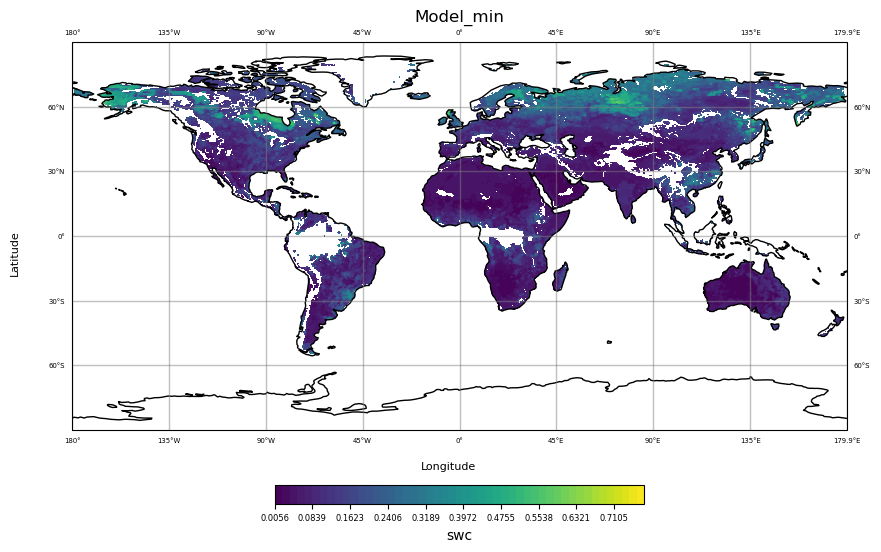

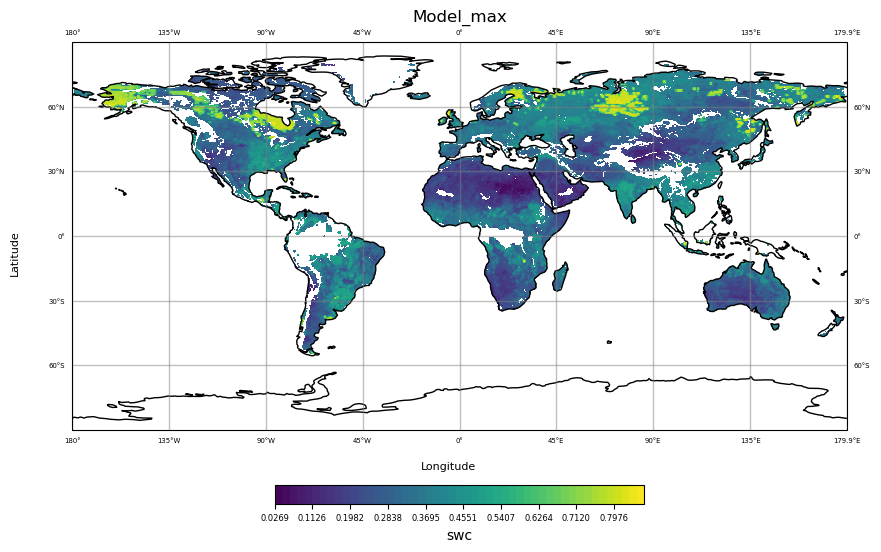

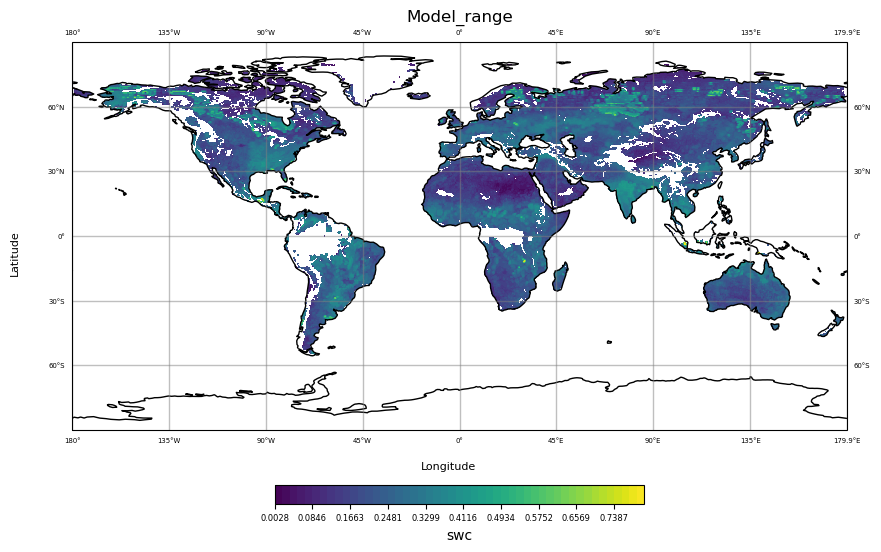

In [4]:
plot_global_contour(lon2d, lat2d, m_min.T, False, 'Model_min', 'swc')
plot_global_contour(lon2d, lat2d, m_max.T, False, 'Model_max', 'swc')
plot_global_contour(lon2d, lat2d, m_range.T, False, 'Model_range', 'swc')

 Saving figure as m_min_cnt.png 



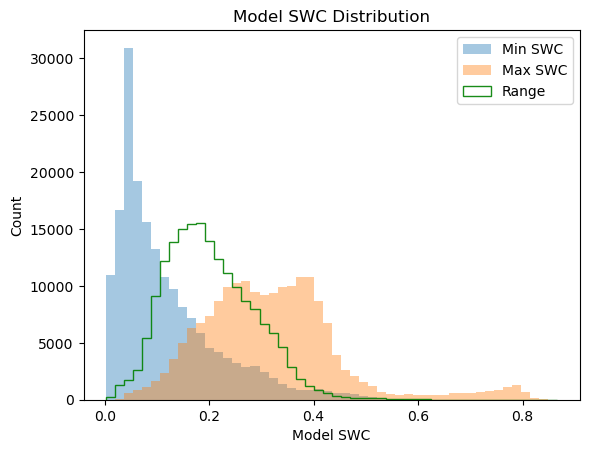

In [5]:
# Generate data
# Create a boolean mask that identifies NaN values in data1
mask = np.isnan(m_min.flatten())
data1 = m_min.flatten()[~mask]

mask = np.isnan(m_max.flatten())
data2 = m_max.flatten()[~mask]

mask = np.isnan(m_range.flatten())
data3 = m_range.flatten()[~mask]

# Define bin edges
combined_data = np.concatenate([data1, data2, data3])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n1, bins, patches = ax.hist(data1, density=False, bins=bin_edges, alpha=0.4, label='Min SWC')
n2, bins, patches = ax.hist(data2, density=False, bins=bin_edges, alpha=0.4, label='Max SWC')
n3, bins, patches = ax.hist(data3, density=False, bins=bin_edges, alpha=0.9, label='Range', color='green', histtype='step', linewidth=1)

# Add labels and title
ax.set_xlabel('Model SWC')
ax.set_ylabel('Count')
ax.set_title('Model SWC Distribution')
ax.legend()

savename = 'm_min_cnt.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [6]:
path = '../test_data'
file_name_start = 'OLv7_M36_ascat.ens_avg.ldas_ObsFcstAna.2015040'
printflag = False

date_time, obs_species, obs_tilenum, obs_lon, obs_lat, obs_obs, obs_obsvar, obs_fcst, obs_fcstvar, obs_ana, obs_anavar = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  727491


In [7]:
path = '../test_data'
file_name_start = 'ASCAT_test_new_scaling.ens_avg.ldas_ObsFcstAna.2015040'
printflag = False

date_time2, obs_species2, obs_tilenum2, obs_lon2, obs_lat2, obs_obs2, obs_obsvar2, obs_fcst2, obs_fcstvar2, obs_ana2, obs_anavar2 = read_obsfcstana(path, file_name_start, printflag)

Total number of obs =  726292


In [8]:
# No-data check
#  - single ensemble member integrations yield obs_obsvar==nodata)  
#  - in some cases obs_fcst (a.k.a. Obs_pred) is no-data-value, 
#     eg. SMOS Tb when snow is present)

nodata = -9999

obs_obsvar[obs_obsvar == nodata] = np.nan
obs_fcst[obs_fcst == nodata] = np.nan
obs_fcstvar[obs_fcstvar == nodata] = np.nan
obs_ana[obs_ana == nodata] = np.nan
obs_anavar[obs_anavar == nodata] = np.nan

In [9]:
# Make obarray
    
numobs = len(obs_obs)
obarray = np.empty([numobs, 3])
obarray[:, 1] = obs_lon
obarray[:, 2] = obs_lat
obarray[:, 0] = obs_obs

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [10]:
# Make obarray
    
numobs2 = len(obs_obs2)
obarray2 = np.empty([numobs2, 3])
obarray2[:, 1] = obs_lon2
obarray2[:, 2] = obs_lat2
obarray2[:, 0] = obs_obs2

# obarray[(obarray[ :, 0] > 1e16) , 0] = np.nan

In [11]:
# find the unique rows based on values in the second and third columns
unique_rows, unique_indices, unique_counts = np.unique(obarray[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows = len(unique_rows)
len(obs_obs), len(unique_rows)

(727491, 465012)

In [12]:
# find the unique rows based on values in the second and third columns
unique_rows2, unique_indices2, unique_counts2 = np.unique(obarray2[:, 1:], axis=0, return_index=True, return_counts=True)

# count the number of unique rows
num_unique_rows2 = len(unique_rows2)
len(obs_obs2), len(unique_rows2)

(726292, 464324)

 Saving figure as unique_counts.png 



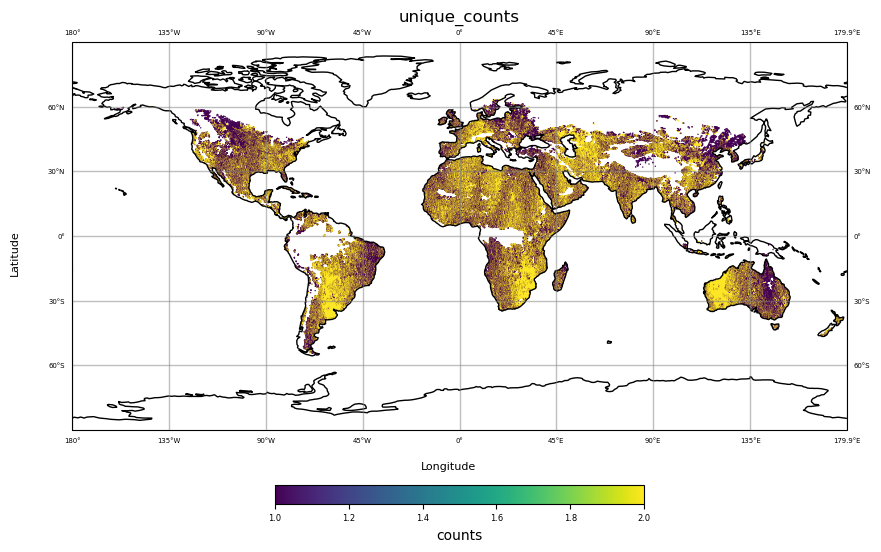

 Saving figure as NA unique_counts.png 



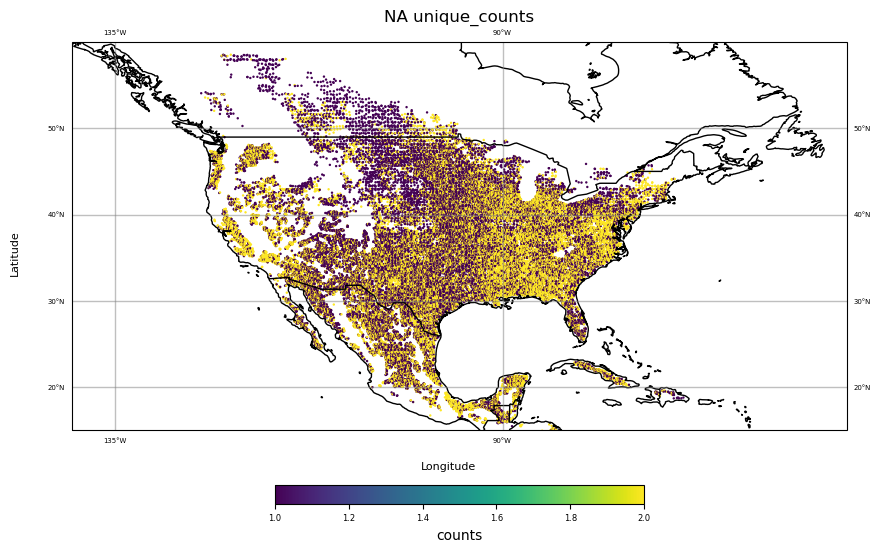

In [13]:
# print the number of occurrences of each unique row
# for i in range(num_unique_rows):
#     print("Row", unique_rows[i], "occurs", unique_counts[i], "times.")

tmp = np.empty([num_unique_rows, 3])
tmp[:, 1] = obarray[unique_indices, 1]
tmp[:, 2] = obarray[unique_indices, 2]
tmp[:, 0] = unique_counts

plot_global(tmp,True,'unique_counts','counts') 
plot_na(tmp,True,'NA unique_counts','counts') 

/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3464: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/Users/amfox/opt/anaconda3/envs/xr/lib/python3.11/site-packages/numpy/core/_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


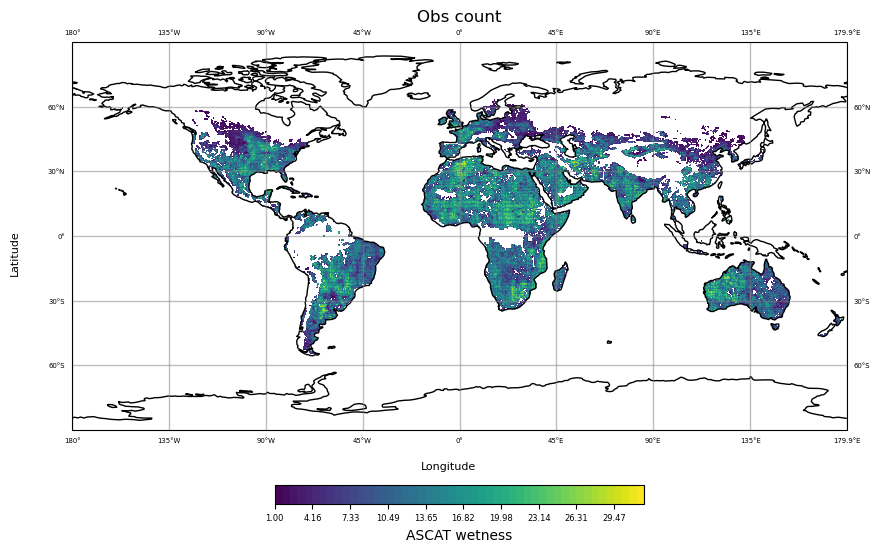

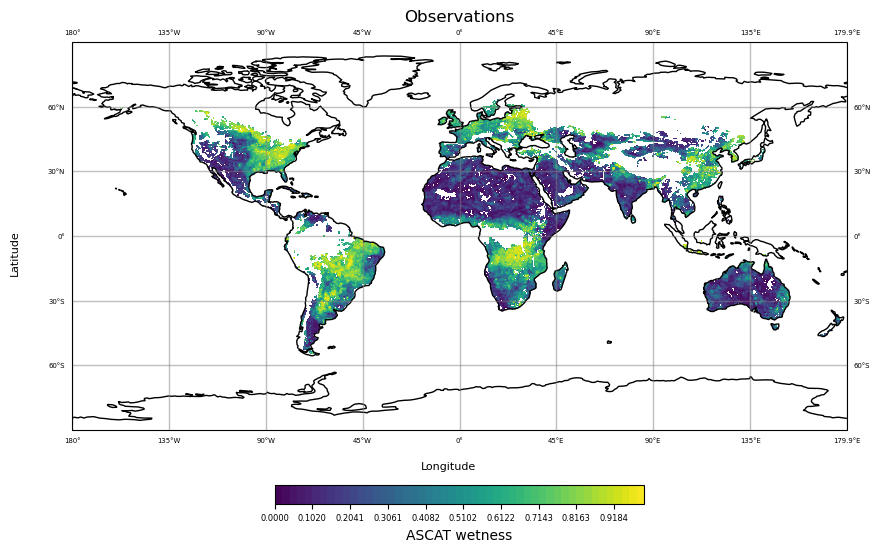

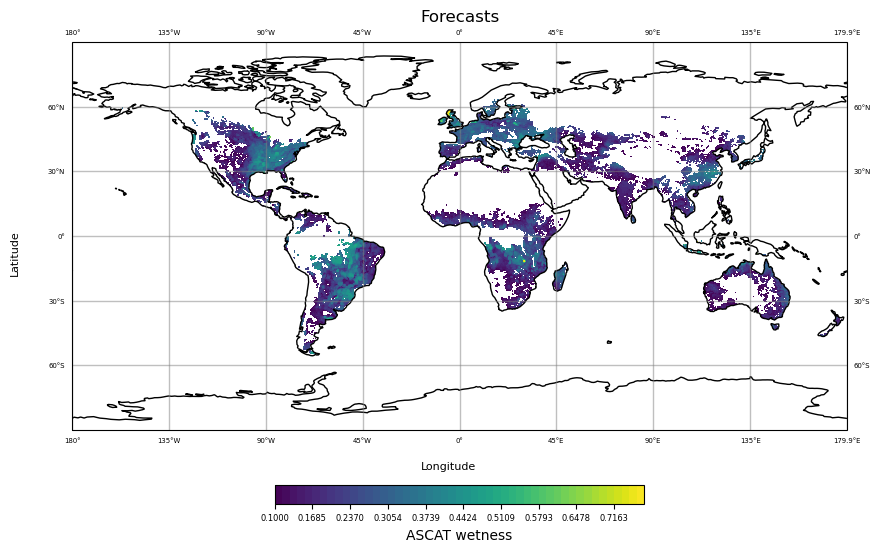

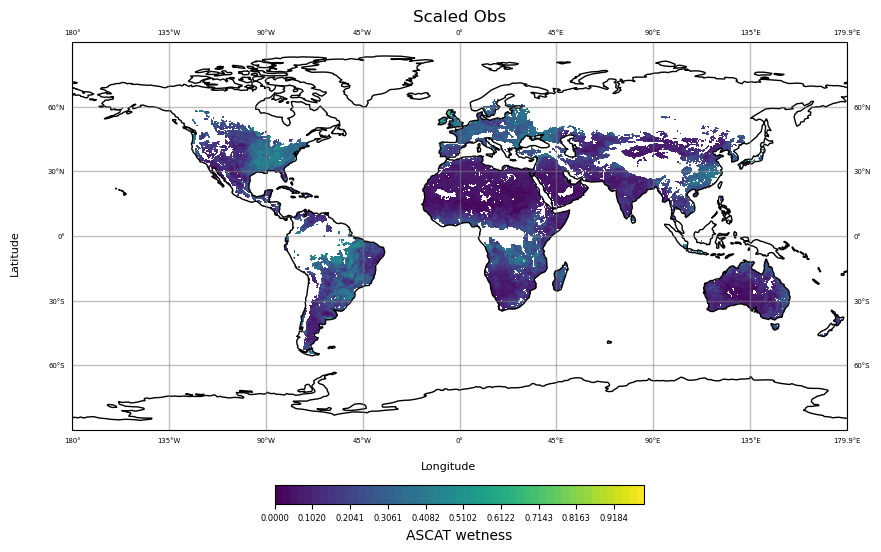

In [14]:
# Put the observation data into a 2D array

#Calculate i,j
ll_lon = -180.0
ll_lat = -90.0
dlon = 0.25
dlat = 0.25

# Calculate the number of grid cells in the x direction
nx = int((180.0 - ll_lon) / dlon)

# Calculate the number of grid cells in the y direction
ny = int((90.0 - ll_lat) / dlat)

n_obs = len(obs_obs)
n_obs2 = len(obs_obs2)

i_out = np.zeros(n_obs)
j_out = np.zeros(n_obs)
i_out2 = np.zeros(n_obs2)
j_out2 = np.zeros(n_obs2)

for i in range(n_obs):
    i_out[i] = np.floor((obs_lon[i] - ll_lon)/dlon)
    j_out[i] = np.floor((obs_lat[i] - ll_lat)/dlat)

for i in range(n_obs2):
    i_out2[i] = np.floor((obs_lon2[i] - ll_lon)/dlon)
    j_out2[i] = np.floor((obs_lat2[i] - ll_lat)/dlat)

# Initialize a list of lists to store the observations for each grid cell
obs_list = [[[] for i in range(ny)] for j in range(nx)]
obs_list2 = [[[] for i in range(ny)] for j in range(nx)]
fcst_list = [[[] for i in range(ny)] for j in range(nx)]

# Find all the observations that fall into each grid cell
for i in range(n_obs):
    obs_list[int(i_out[i])][int(j_out[i])].append(obs_obs[i])
    fcst_list[int(i_out[i])][int(j_out[i])].append(obs_fcst[i])

for i in range(n_obs2):
    obs_list2[int(i_out2[i])][int(j_out2[i])].append(obs_obs2[i])


# Calculate the mean of the observations in each grid cell
obs_mean = np.zeros([nx, ny])
obs_count = np.zeros([nx, ny])
obs_mean2 = np.zeros([nx, ny])
fcst_mean = np.zeros([nx, ny])

for i in range(nx):
    for j in range(ny):
        if len(obs_list[i][j]) > 0:
            obs_mean[i, j] = np.mean(obs_list[i][j])
            obs_count[i, j] = len(obs_list[i][j])
            obs_mean2[i, j] = np.mean(obs_list2[i][j])
            fcst_mean[i, j] = np.mean(fcst_list[i][j])
        else:
            obs_mean[i, j] = np.nan
            obs_count[i, j] = np.nan
            obs_mean2[i, j] = np.nan
            fcst_mean[i, j] = np.nan

# Plot the mean of the observations in each grid cell
plot_global_contour(lon2d, lat2d, obs_count.T, False, 'Obs count', 'ASCAT wetness')
plot_global_contour(lon2d, lat2d, obs_mean.T, False, 'Observations', 'ASCAT wetness',0,1)
plot_global_contour(lon2d, lat2d, fcst_mean.T, False, 'Forecasts', 'ASCAT wetness',0.1)
plot_global_contour(lon2d, lat2d, obs_mean2.T, False, 'Scaled Obs', 'ASCAT wetness',0,1)

In [15]:
# Create a boolean mask that identifies the NaN values
nan_mask = np.isnan(obs_count)

# Find the indices of the 10 highest non-NaN values in my_array
flat_indices = np.argpartition(obs_count[~nan_mask], -10)[-10:]
indices = np.unravel_index(np.flatnonzero(~nan_mask)[flat_indices], obs_count.shape)

# Print the 10 highest non-NaN values and their indices
print('Top 10 non-NaN values:', obs_count[indices])
print('Indices of top 10 non-NaN values:', indices)

Top 10 non-NaN values: [30. 30. 31. 31. 31. 30. 32. 30. 32. 30.]
Indices of top 10 non-NaN values: (array([462, 717, 508, 983, 777, 819, 729, 729, 747, 934]), array([229, 494, 262, 509, 452, 261, 494, 497, 433, 498]))


In [16]:
data1 = obs_list[indices[0][0]][indices[1][0]]
data2 = obs_list2[indices[0][0]][indices[1][0]]
data3 = fcst_list[indices[0][0]][indices[1][0]]

data11 = obs_list[indices[0][1]][indices[1][1]]
data21 = obs_list2[indices[0][1]][indices[1][1]]
data31 = fcst_list[indices[0][1]][indices[1][1]]

 Saving figure as obs_dis_fqy.png 



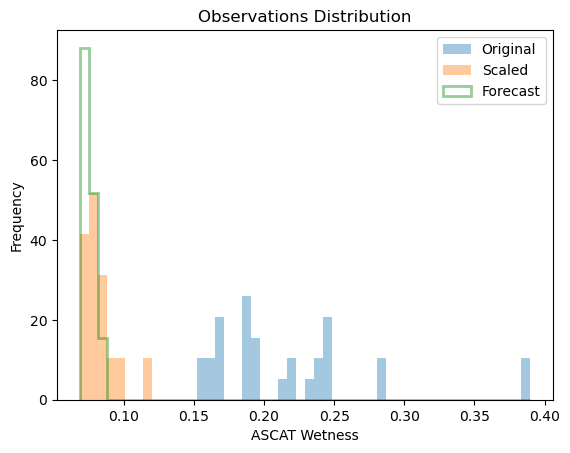

In [17]:
# Define bin edges
combined_data = np.concatenate([data11, data21, data31])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data11, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data21, density=True, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data31, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='green', histtype='step', linewidth=2)

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
#plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [18]:
# Count the number of negative values
num_negatives = np.sum(obs_obs2 < 0)

# Print the result
print("Number of negative values:", num_negatives)

# Create a boolean mask for negative values
mask = obs_obs2 < 0

# Create a new array containing only the negative values
negatives = obs_obs2[mask]

# Print the negative values
print("Negative values:", negatives)

# Get the indices of the negative values
indices = np.where(mask)[0]

# Print the indices of the negative values
print("Indices of negative values:", indices)

Number of negative values: 0
Negative values: []
Indices of negative values: []


 Saving figure as obs_dis_fqy.png 



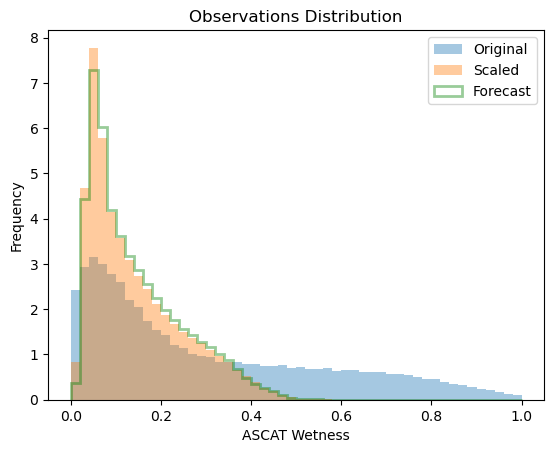

In [19]:
# Generate data
data1 = obs_obs
data2 = obs_obs2
data3 = obs_fcst2

# Define bin edges
combined_data = np.concatenate([data1, data2, data3])
bin_edges = np.linspace(np.min(combined_data), np.max(combined_data), 51)

# Plot histogram as a line
fig, ax = plt.subplots()

n2, bins, patches = ax.hist(data1, density=True, bins=bin_edges, alpha=0.4, label='Original')
n1, bins, patches = ax.hist(data2, density=True, bins=bin_edges, alpha=0.4, label='Scaled')
n3, bins, patches = ax.hist(data3, density=True, bins=bin_edges, alpha=0.4, label='Forecast', color='green', histtype='step', linewidth=2)

# Add labels and title
ax.set_xlabel('ASCAT Wetness')
ax.set_ylabel('Frequency')
ax.set_title('Observations Distribution')
ax.legend()

savename = 'obs_dis_fqy.png'
print(" Saving figure as", savename, "\n")
plt.savefig(savename, dpi = 400)  

# Show plot
plt.show()

In [20]:
import re

# Open the file for reading
with open('../test_data/ASCAT_test_new_scaling.ldas_log.20150401_0000z.txt', 'r') as file:

    # Read the file contents
    contents = file.read()

    # Define the regular expression pattern
    pattern = r'Total count: (\d+)  Less than count: (\d+)  Greater than count: (\d+)'

    # Find all the lines that match the pattern
    matches = re.findall(pattern, contents)

    # Calculate the mean of the total_count values
    total_counts = [int(match[0]) for match in matches]
    mean_total_count = sum(total_counts) / len(total_counts)
    mean_less_than_count = sum([int(match[1]) for match in matches]) / len(matches)
    mean_greater_than_count = sum([int(match[2]) for match in matches]) / len(matches)

    # Print the mean total count
    print(f'Number of observation species windows: {len(matches)}')    
    print(f'Mean total count: {mean_total_count}')
    print(f'Mean less than count: {mean_less_than_count}')
    print(f'Mean greater than count: {mean_greater_than_count}')

    print(f'Percentage of observations removed because too low: {mean_less_than_count / mean_total_count * 100:.2f}%')
    print(f'Percentage of observations removed because too high: {mean_greater_than_count / mean_total_count * 100:.2f}%')

Number of observation species windows: 160
Mean total count: 9265.3625
Mean less than count: 676.5625
Mean greater than count: 98.775
Percentage of observations removed because too low: 7.30%
Percentage of observations removed because too high: 1.07%
